<a href="https://colab.research.google.com/github/Ashu598/Customer-Segmentation-RFM/blob/main/Customer_Segmentation_(RFM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [7]:
# Downloaded data from kaggle in Zip file, extracting the file and saving it in collab folder
import zipfile
zip_ref = zipfile.ZipFile('/content/OnlineRetail.csv.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
df = pd.read_csv("/content/OnlineRetail.csv" , encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

In [9]:
df.shape   #shape of the data

(541909, 8)

In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The dataset contains few null values in the Description and CustomerID column.

InvoiceDate is in object type, we have to convert it into datetime.

We will treat them soon before EDA.

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The Quantity and UnitPrice column shows the minimum values in negative. The reason might be the cancelled orders.

The distribution of Quantity and UnitPrice looks to be skewed as there's a huge difference between the 75th percentile and the maximum value.

**Handling Missing and Duplicate values**

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.duplicated().sum()

5268

There are 5268 duplicated records present in the data.

Few missing values present in Description and CustomerID columns.

In [ ]:
df.drop_duplicates(inplace = True)  #dropped duplicates

In [ ]:
df.dropna(inplace = True)    #dropped missing values

In [ ]:
dup = df.duplicated().sum()
print("Duplicate Values : " , dup)

null_val = df.isnull().sum()
print("Missing Values in the dataframe : ", null_val)

Duplicate Values :  0
Missing Values in the dataframe :  InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
df.shape   #now shape of the dataframe

(401604, 8)

We have treated the missing values and the duplicated records. After removal of these values, the shape of our dataset is (401604, 8).

We will now check for the cancelled orders.

In [ ]:
df[df['InvoiceNo'].str.startswith('C')]   #finding cancelled orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


There are 8872 records where the orders are cancelled and the quantity contains a negative value.

We will drop these cancelled order records from our analysis.

In [ ]:
# consider only the non cancelled orders
df = df[~df['InvoiceNo'].str.startswith('C')]

# check the shape of the data after removing cancelled orders
df.shape

(392732, 8)

In [ ]:
df.describe()       #describe the dataset

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


There are no negative values in the Quantity and UnitPrice column now.

But we can still see a minimum value of 0 in the UnitPrice column which cannot be real as a store cannot sell items for free.

We will investigate this column and remove those records.

In [ ]:
df[df['UnitPrice']==0].count()

InvoiceNo      40
StockCode      40
Description    40
Quantity       40
InvoiceDate    40
UnitPrice      40
CustomerID     40
Country        40
dtype: int64

In [ ]:
df = df[df['UnitPrice'] > 0]   #will not consider rows with 0 UnitPrice
df.shape

(392692, 8)

Our dataset is almost a cleaned one now and we can move to EDA but before that we can create some additional features for our dataset.

We have to convert InvoiceDate column into datetime format.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#converted InvoiceDate into datetime data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [ ]:
# create some new features from invoice date

df['day'] = df['InvoiceDate'].dt.day_name()
df['month_name'] = df['InvoiceDate'].dt.month_name()
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month'] = df['InvoiceDate'].apply(lambda x: x.month)
df['date'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['minute'] = df['InvoiceDate'].apply(lambda x: x.minute)

# create TotalAmount from Quantity and UnitPrice
df['total_amt'] = df['Quantity'] * df['UnitPrice']

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month_name,year,month,date,hour,minute,total_amt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Friday,December,2011,12,9,12,50,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Friday,December,2011,12,9,12,50,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,December,2011,12,9,12,50,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,December,2011,12,9,12,50,16.60


**Exploratory Data Analysis (EDA):**

Which products are the most sold ones?

In [ ]:
most_sold = df['Description'].value_counts().reset_index()
most_sold.head(10)         #10 most sold items

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389
5,LUNCH BAG RED RETROSPOT,1303
6,SET OF 3 CAKE TINS PANTRY DESIGN,1152
7,POSTAGE,1099
8,LUNCH BAG BLACK SKULL.,1078
9,PACK OF 72 RETROSPOT CAKE CASES,1050


Text(0.5, 1.0, 'Top 5 most sold products')

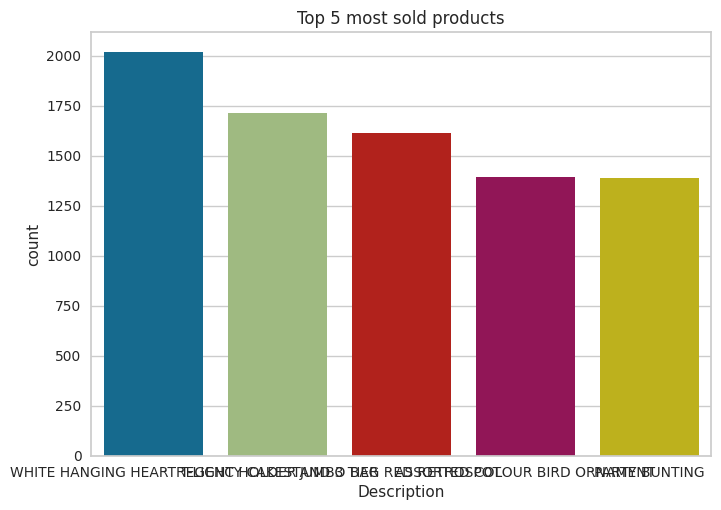

In [ ]:
# plot the top 5 most sold products
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Description', y='count', data=most_sold[:5])
plt.title('Top 5 most sold products')


Which products are the least sold ones?

In [ ]:
most_sold.tail(5)

,Description,count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Which countries has the most number of customers?

In [ ]:
top_countries = df['Country'].value_counts().reset_index()
top_countries.head(5)

,Country,count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


As it is an UK based company, a huge chunk of the customers are from United Kingdom only.


<Axes: xlabel='Country', ylabel='count'>

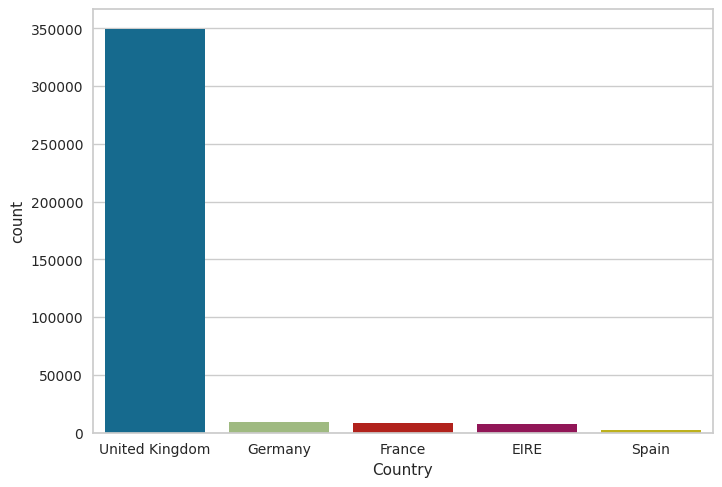

In [ ]:
sns.barplot(x = 'Country', y = 'count', data = top_countries.head(5))

In [ ]:
#Countries having the least number of customers

top_countries.tail(5)

,Country,count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


How many unique customers are there?

In [ ]:
len(df['CustomerID'].unique())

4338

There are 4338 unique customers present in the whole transactional dataset.

What is the order share of the top 10 customers?

In [ ]:
cx_id_count = df['CustomerID'].value_counts()
cx_id_total = df['CustomerID'].value_counts().sum()

cx_order_share = ((cx_id_count/cx_id_total)*100).reset_index()
cx_order_share.columns = ['Customer ID', 'Order Share']
cx_order_share

,Customer ID,Order Share
0,17841.0,1.954713
1,14911.0,1.443880
2,14096.0,1.301529
3,12748.0,1.123527
4,14606.0,0.681705
...,...,...
4333,16765.0,0.000255
4334,13302.0,0.000255
4335,13270.0,0.000255
4336,16148.0,0.000255


<Axes: xlabel='Customer ID', ylabel='Order Share'>

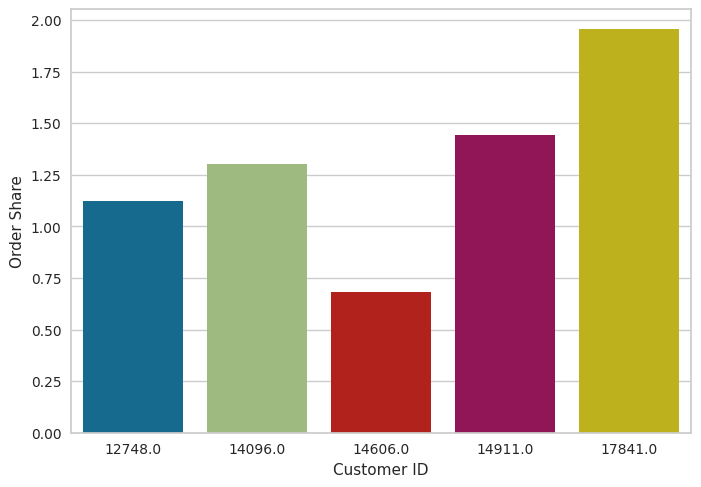

In [ ]:
sns.barplot(x= 'Customer ID', y= 'Order Share', data = cx_order_share.head(5))

In [ ]:
#Finding the cumulative sum
cx_order_share['Order Share'] = cx_order_share['Order Share'].head().cumsum()
cx_order_share.head()


,Customer ID,Order Share
0,17841.0,1.954713
1,14911.0,3.398592
2,14096.0,4.700121
3,12748.0,5.823648
4,14606.0,6.505353


We can observe that only 5 customers out of 4338 unique customers are responsible for approx 6.5% of the total orders.

**Let us check the distribution of the numerical features:**

/tmp/ipykernel_33/2277552823.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
/tmp/ipykernel_33/2277552823.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/2277552823.py:7: UserWarning: 

`distplot

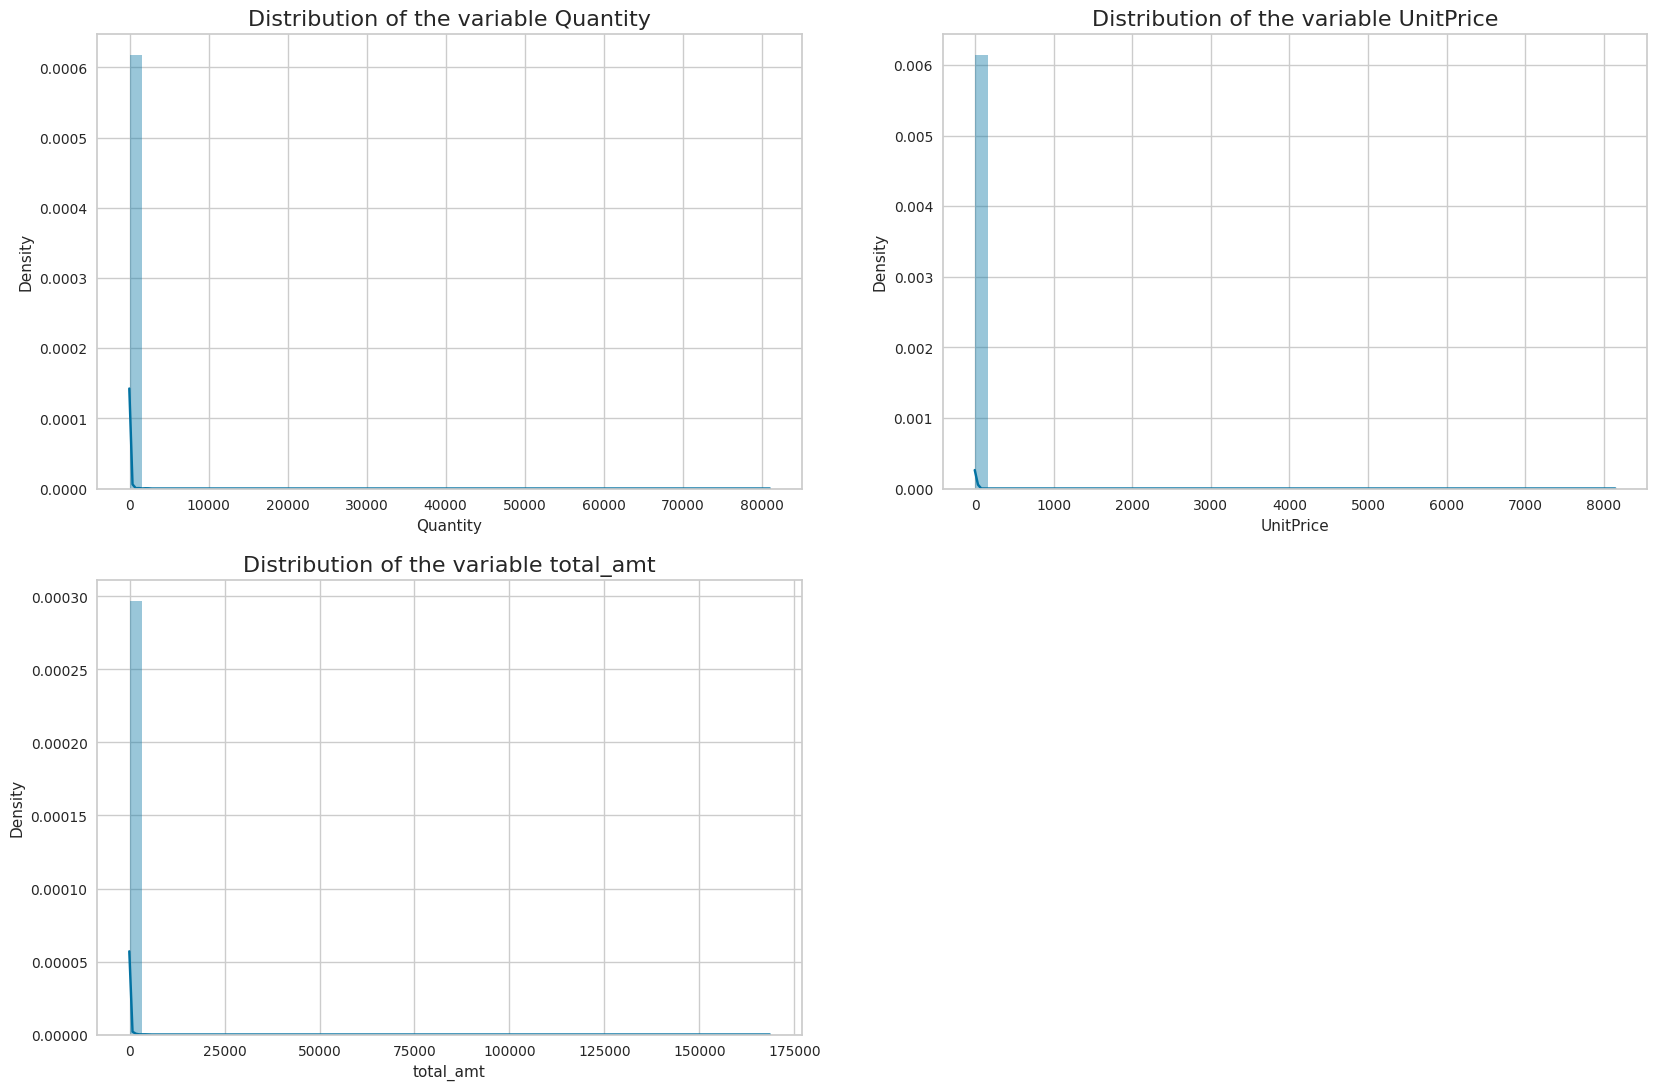

In [ ]:
# plot the distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'total_amt']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1


The distribution of all the variables are heavily right skewed.

We will apply log transformation on these variables to make it less skewed.

/tmp/ipykernel_33/1565021149.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
/tmp/ipykernel_33/1565021149.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df[feature]))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/1565021149.py:6: UserWarning: 


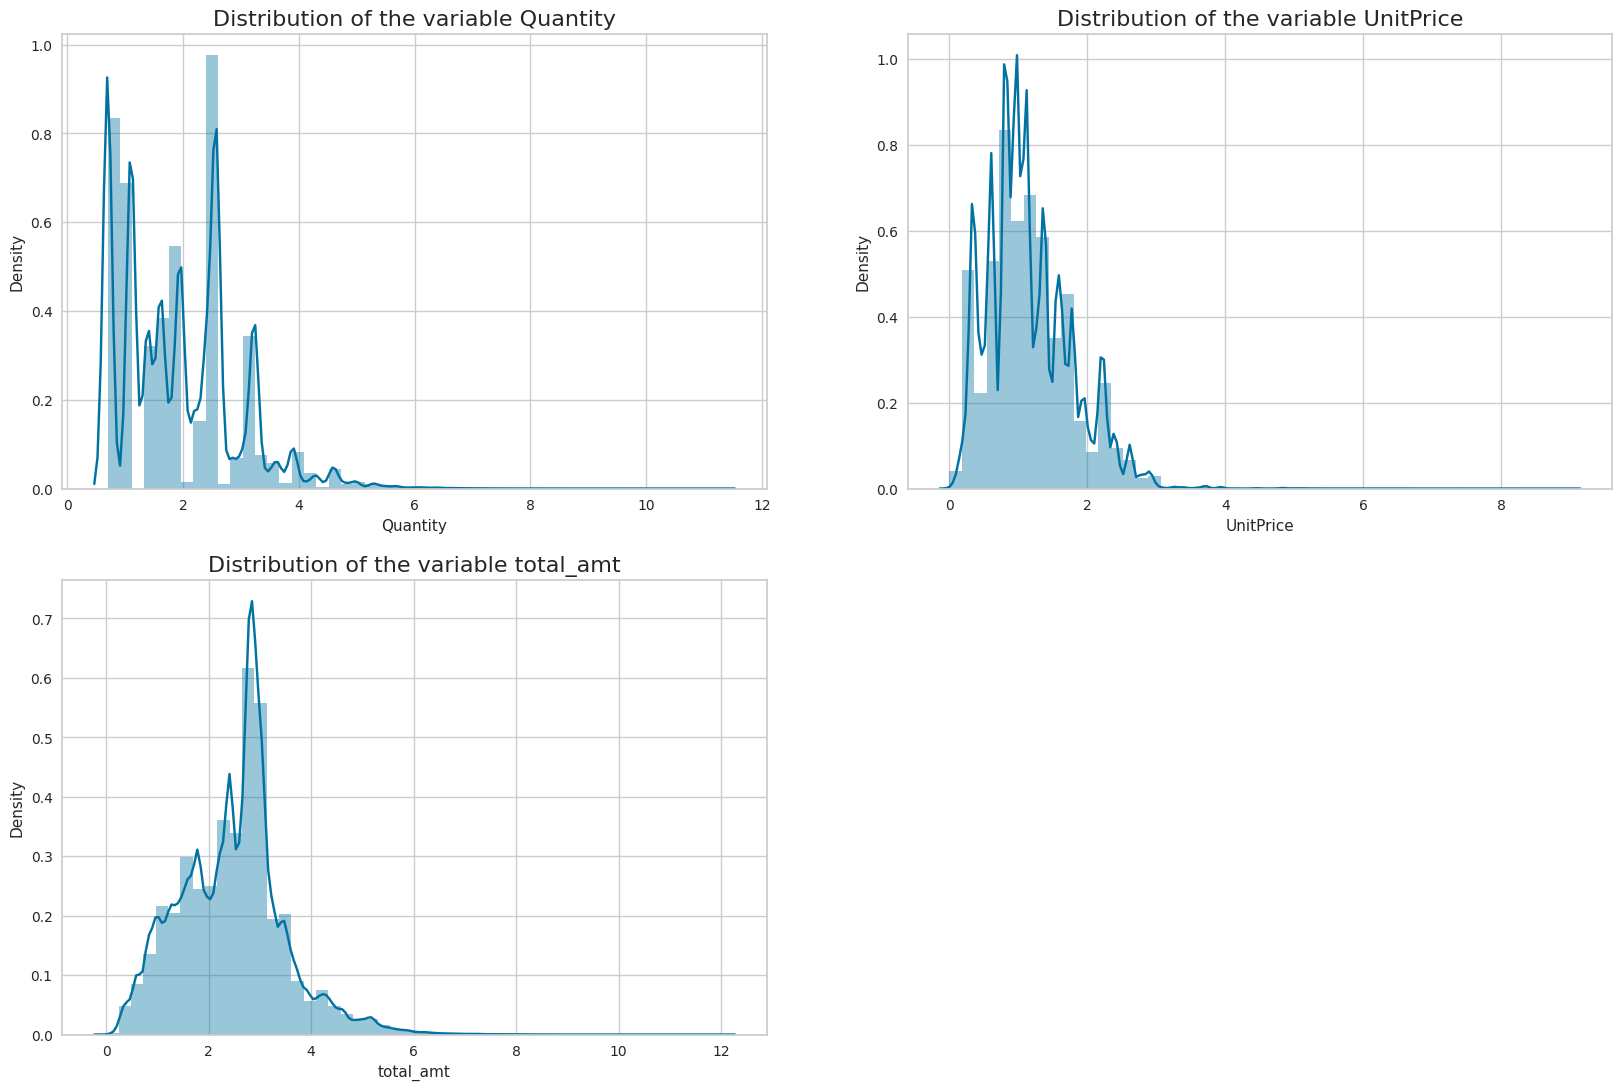

In [ ]:
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

The variables after log transformation are less skewed than before.

It isn't a normal distribution but somewhat close to that than before.

Which day of the week had the most and the least number of purchases?


In [ ]:
top_productive_day = df['day'].value_counts().reset_index()
top_productive_day.columns = ['Day name', 'Count']
top_productive_day

,Day name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


<Axes: xlabel='Day name', ylabel='Count'>

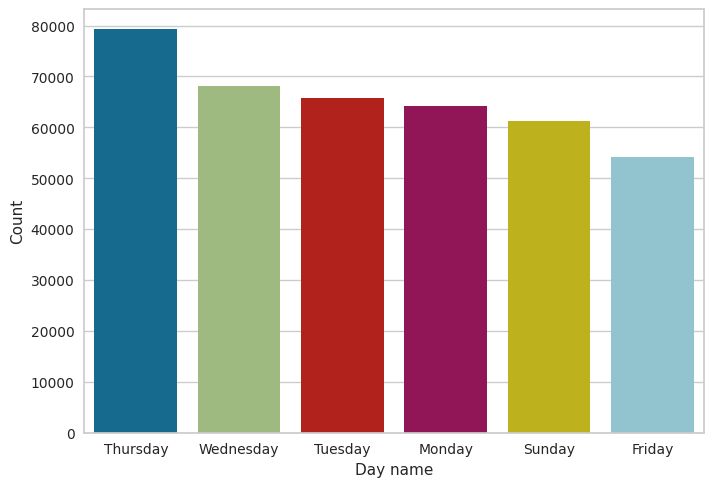

In [ ]:
sns.barplot(x = 'Day name', y = 'Count' ,data = top_productive_day)

Most of the customers have made a purchase in Thursday followed by Wednesday.

Friday is the day with least number of purchases made.

Which month had the most and the least number of purchases?

In [ ]:
top_productive_month = df['month_name'].value_counts().reset_index()
top_productive_month.columns = ['Month Name', 'Count']
top_productive_month

,Month Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


<Axes: xlabel='Month Name', ylabel='Count'>

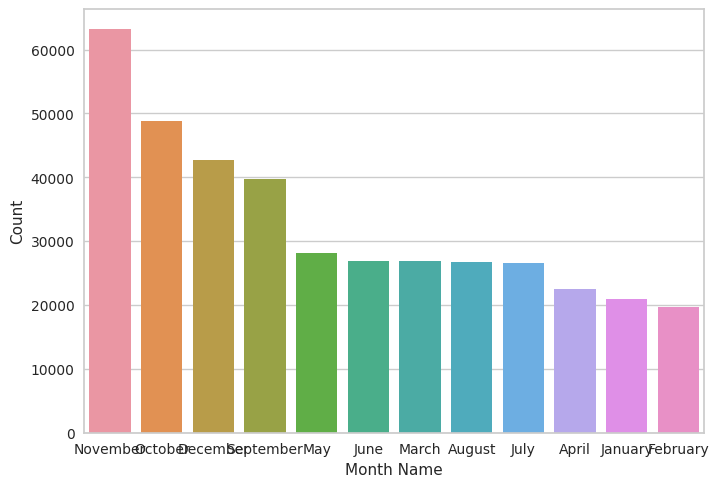

In [ ]:
sns.barplot(x = 'Month Name', y = 'Count', data = top_productive_month)

The most number of purchases are made during October to December which is a festive season for many people.

The least number of purchases are made during the initial months of a year, January and February which is quite obvious because as soon as the festive season ends, purchases or sales will go down.

**Let us create the RFM Model (Recency, Frequency and Monetary):**

The RFM model is based on three quantitative factors:

Recency: How recently a customer has made a purchase

Frequency: How often a customer makes a purchase

Monetary Value: How much money a customer spends on purchases

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

Being a UK based retail store and as most of the customers or a huge chunk of customers are from UK, we have decided to consider the UK based customers only for segmentation.

In [ ]:
uk_df = df[df['Country']== 'United Kingdom']
uk_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month_name,year,month,date,hour,minute,total_amt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,Friday,December,2011,12,9,12,31,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,Friday,December,2011,12,9,12,49,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,Friday,December,2011,12,9,12,49,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,Friday,December,2011,12,9,12,49,214.80


Calculating RFM Scores:

In [ ]:
# set latest date to '2011-12-10' as the last invoice date was '2011-12-09'
import datetime as dt
latest_date = dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [ ]:

# create rfm modeling scores for each customer
rfm_df = uk_df.groupby('CustomerID').agg({'InvoiceDate' : lambda x: (latest_date - x.max()).days, 'InvoiceNo' : lambda x: len(x), 'total_amt' : lambda x: x.sum()})

rfm_df.head()

,InvoiceDate,InvoiceNo,total_amt
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4412,33053.19
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [ ]:
# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'total_amt': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [ ]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,89.082398,1858.424654
std,99.533485,214.034542,7478.631256
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,298.185000
50%,50.000000,40.000000,644.975000
75%,142.000000,98.000000,1571.285000
max,373.000000,7676.000000,259657.300000


/tmp/ipykernel_33/1494215465.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
/tmp/ipykernel_33/1494215465.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df[feature])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/1494215465.py:6: UserWarning: 

`dist

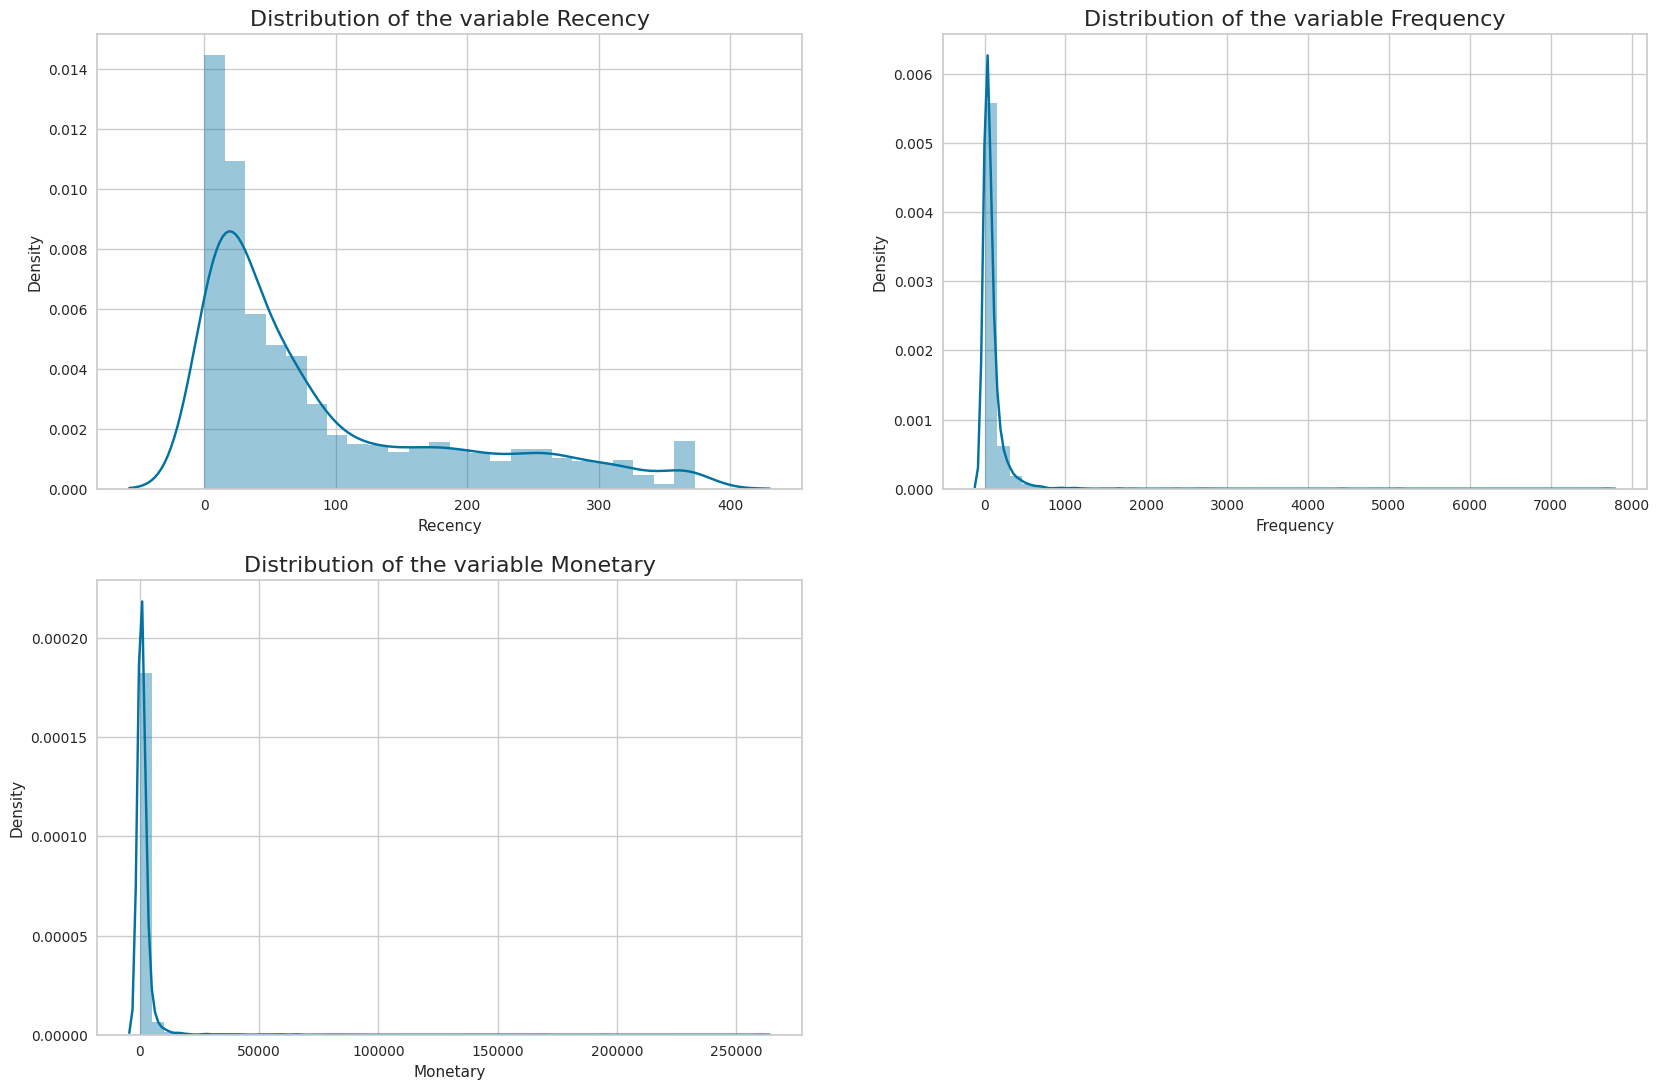

In [ ]:
#Let us plot the distribution of Recency, Frequency and Monetary Value:
count = 1
plt.subplots(figsize=(20,13))
for feature in rfm_df:
  plt.subplot(2,2,count)
  sns.distplot(rfm_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

**Apply log transformation to the RFM values and plot each distribution:**

Applying a log transformation in the context of RFM (Recency, Frequency, Monetary) analysis, or any data analysis task, serves several important purposes:

**Normalization**: RFM metrics can vary significantly in scale. For example, monetary values can range from a few dollars to thousands, while frequency might vary from 1 to hundreds of times. A log transformation helps to normalize these scales, making it easier to compare and analyze data across different scales.

**Handling Skewed Data:** Many datasets, especially those involving monetary values or counts (like frequency), are often right-skewed, meaning most of the data points are clustered around the lower end of the scale with a long tail extending towards higher values. Log transformation helps in reducing the skewness, making the distribution more symmetrical and closer to a normal distribution. This is beneficial because many statistical methods and machine learning algorithms assume or perform better with data that is approximately normally distributed.

**Reducing the Impact of Outliers:** In RFM data, you might encounter extreme values or outliers, such as very high monetary values or unusually frequent purchases. These outliers can disproportionately influence the analysis. Log transformation reduces the impact of outliers by bringing them closer to the rest of the data points, thus providing a more balanced view.

In [ ]:
# treat the negative and zero values to handle infinite numbers during log transformation

def handle_negative(num):
    if num <= 0:
        return 1
    else:
        return num

# let's apply this function to recency and monetary features
rfm_df['Recency'] = [handle_negative(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [handle_negative(y) for y in rfm_df['Monetary']]


# apply log transfomation to RFM values
log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

/tmp/ipykernel_33/1396986685.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
/tmp/ipykernel_33/1396986685.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_df[feature])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/1396986685.py:6: UserWarning: 

`dist

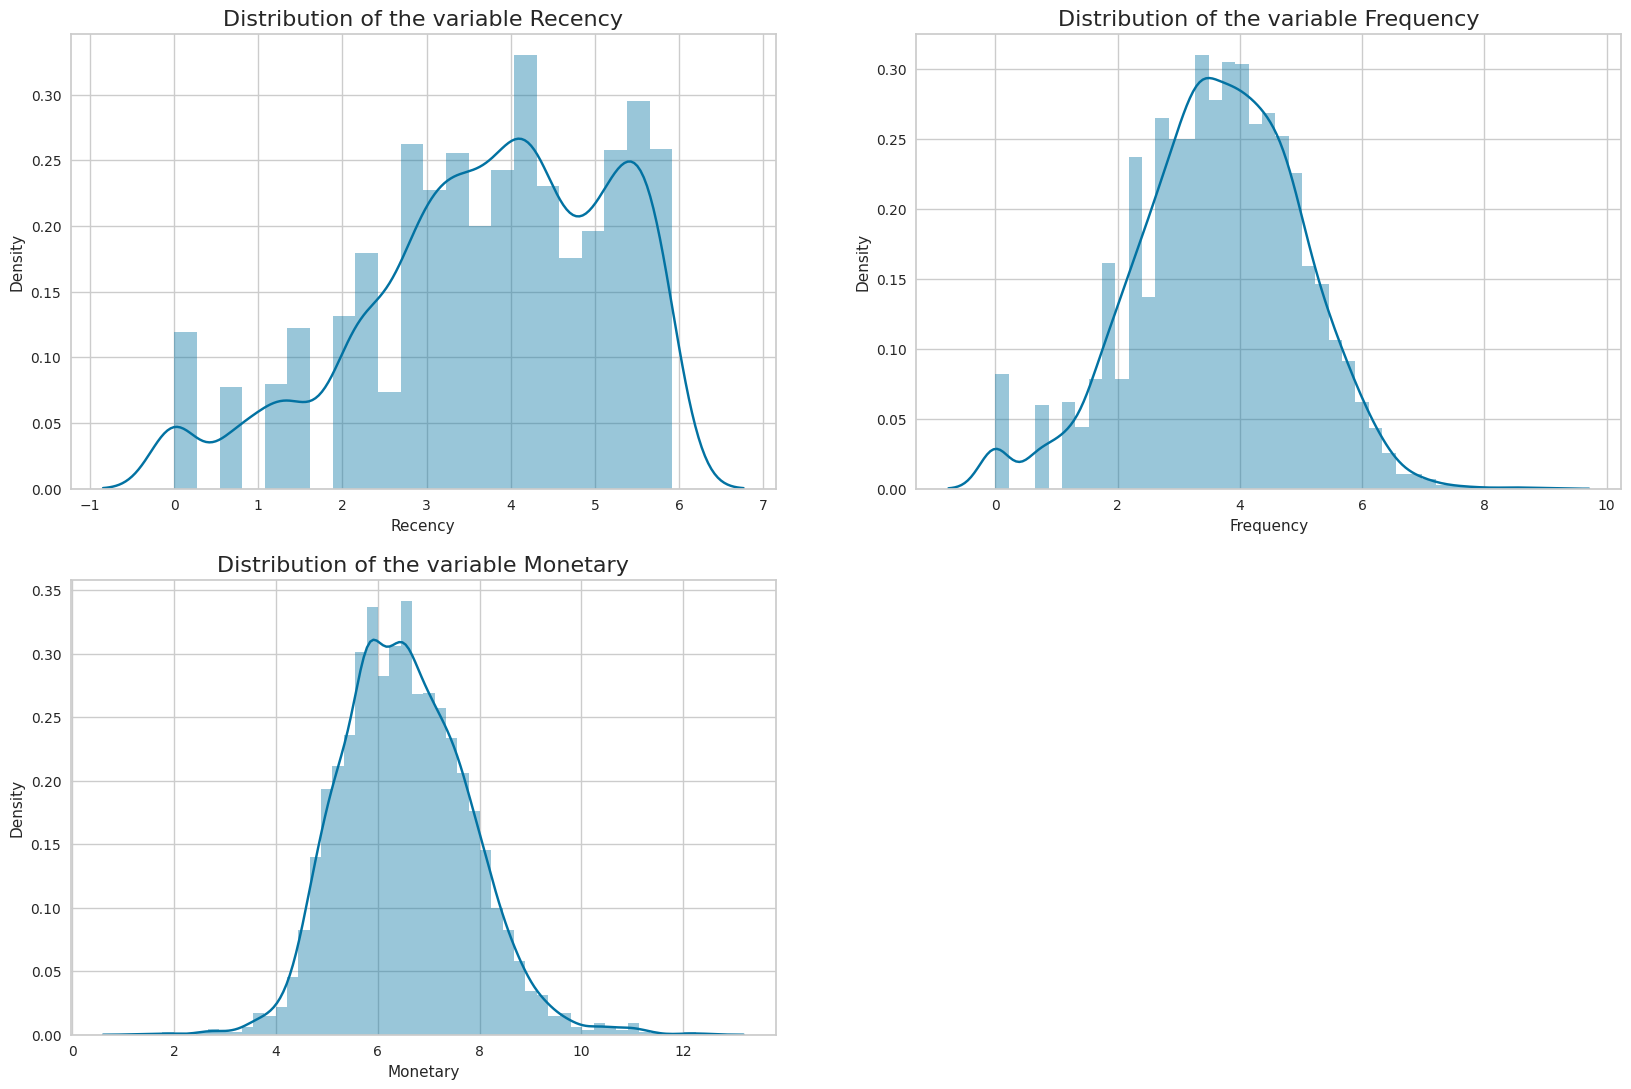

In [ ]:
# plot the log transformed distribution
count = 1
plt.subplots(figsize=(20,13))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.distplot(log_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

The distribution of Recency, Frequency and Monetary values almost looks normal now.

In [ ]:
# apply log transformation on the original rfm dataframe
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942
12747.0,2,103,4196.01,0.693147,4.634729,8.341889
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873
12749.0,3,199,4090.88,1.098612,5.293305,8.316515
12820.0,3,59,942.34,1.098612,4.077537,6.848366


In [ ]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

# scaling our data
from sklearn.preprocessing import StandardScaler

X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

Implementing K-Means Clustering:

Applying Elbow method on Recency, Frequency and Monetary:

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

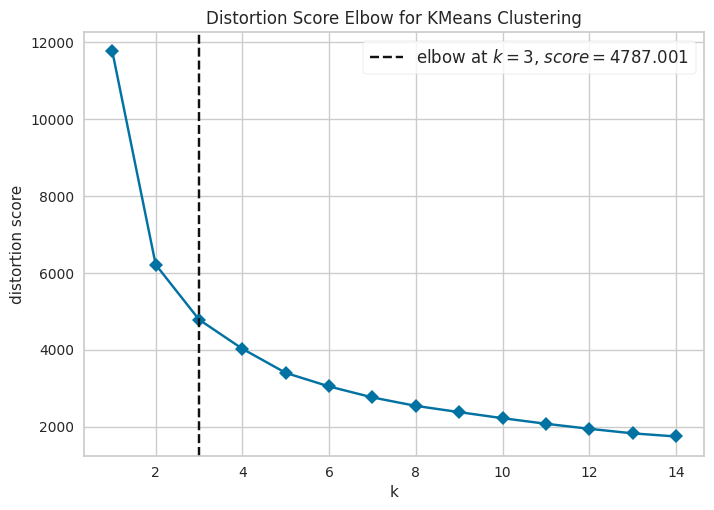

In [ ]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

From the elbow method we reach the conclusion that the optimal number of clusters is 3 for Recency, Frequency and Monetary values.

We will again run the model with number of clusters as 3.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


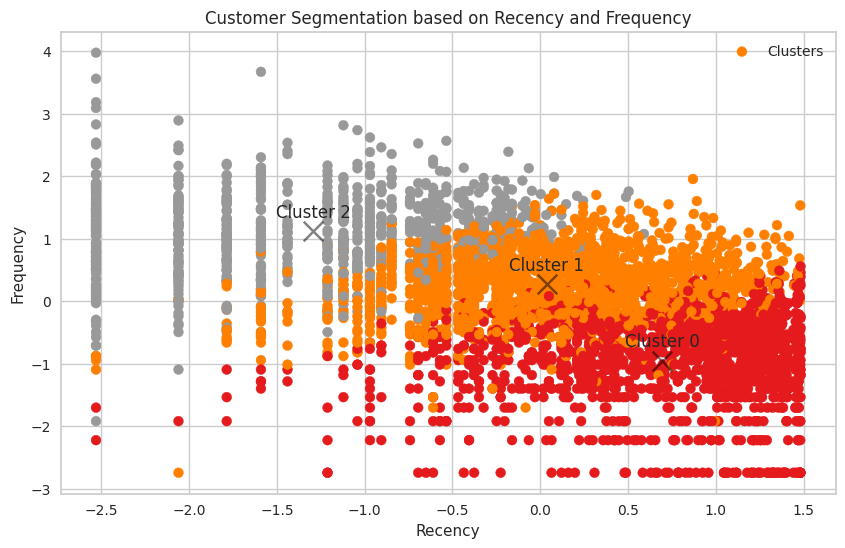

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your data array
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can observe three clusters from the KMeans model applied on Recency, Frequency and Monetary data.

Interpreting the Clusters with the help of RFM Group:

In [ ]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
# calculate RFM segment values for each record
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1
3,12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2


Calculate RFM Group and RFM Score from the RFM segmentation:

In [ ]:
# add RFM group column
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3
3,12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,111,3
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5


In [ ]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9,1
12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3,2
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3,2
12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,111,3,2
12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5,2


### **Interpretation:**

1. **Cluster 0**:
   - **Recency**: High (average around 165 days)
   - **Frequency**: Low (average around 15 transactions)
   - **Monetary**: Low (average around $286)
   - **Interpretation**: Customers in this cluster are likely to be 'At-Risk' or 'Lapsed' customers. They haven't made purchases recently, and when they did, they didn't do so very frequently and didn't spend much. These customers might have been one-time buyers or occasional shoppers. Engaging them with reactivation campaigns or exploring why they haven’t returned can be a strategic move.

2. **Cluster 1**:
   - **Recency**: Very Low (average around 11 days)
   - **Frequency**: Very High (average around 259 transactions)
   - **Monetary**: Very High (average around $5933)
   - **Interpretation**: This cluster represents your 'Champions' or 'Loyal' customers. They shop frequently, recently, and spend the most. They are the most valuable segment, likely to respond positively to new offers, up-sell and cross-sell opportunities. Maintaining their high engagement level is crucial, and they can also be targeted for feedback or as brand ambassadors.

3. **Cluster 2**:
   - **Recency**: Moderate (average around 68 days)
   - **Frequency**: Moderate (average around 69 transactions)
   - **Monetary**: Moderate (average around $1200)
   - **Interpretation**: Customers in this cluster can be seen as 'Potential Loyalists' or 'Promising' customers. They have a balanced score in all three RFM metrics. These customers have the potential to become more valuable if properly engaged. Tailored marketing strategies, loyalty programs, and incentives to increase their purchase frequency and value can be effective.

**Overall Strategy**:
- **Cluster 0 ('At-Risk/Lapsed')**: Focus on re-engagement strategies. Understand their needs and reasons for not returning. Offer incentives or feedback surveys to encourage them to revisit and make purchases.
- **Cluster 1 ('Champions/Loyal')**: Prioritize maintaining their high level of engagement. Offer exclusive deals, loyalty programs, and early access to new products. They can also be engaged in referral programs.
- **Cluster 2 ('Potential Loyalists/Promising')**: Encourage them to visit and buy more often. Personalized communication, recommending products based on past purchases, and loyalty rewards can be effective.


Thus, from our comparison table we can conclude that KMeans clustering on Recency, Frequency and Monetary data gives us the best result with the optimal number of clusters as 3. We can use this model to cluster our data in 3 segments and develop better marketing strategies.